In [1]:
### This was based on https://github.com/aclarkData/Journal-Entry-Machine-Learning
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
je_data = pd.read_csv("jan-jun-je.xls")

In [3]:
### Convert date object to date
je_data['Date'] = pd.to_datetime(je_data['Date'])

In [4]:
### Convert date to int
je_data['Date Int'] = pd.to_numeric(je_data['Date'])

In [5]:
je_data = je_data.fillna(0)

In [6]:
je_data.dtypes

Account                 object
Date            datetime64[ns]
Sum Amount             float64
Line Descr              object
Journal ID              object
User                    object
Unit                    object
Resource                object
Activity                object
Physical Loc            object
Project                 object
Currency                object
Reversal                object
Sys Source              object
Source                  object
Date Int                 int64
dtype: object

In [16]:
from sklearn.feature_extraction import DictVectorizer

# Turn categorical features into 1-hot encoded features
categorical_features = je_data[['Account', 'User', 'Unit', 'Resource',
                                'Activity', 'Physical Loc', 'Project']] #
#dv = DictVectorizer()
# accounts = pd.get_dummies(je_data['Account']).rename(columns=lambda x: str(x))
# users = pd.get_dummies(je_data['User']).rename(columns=lambda x: str(x))
# units = pd.get_dummies(je_data['Unit']).rename(columns=lambda x: str(x))
# resources = pd.get_dummies(je_data['Resource']).rename(columns=lambda x: str(x))
# activities = pd.get_dummies(je_data['Activity']).rename(columns=lambda x: str(x))
# locations = pd.get_dummies(je_data['Physical Loc']).rename(columns=lambda x: str(x))
# projects = pd.get_dummies(je_data['Project']).rename(columns=lambda x: str(x))
# data_matrix = pd.concat([accounts,users,units,resources,activities,locations,je_data[['Sum Amount']]], axis=1)
cat_matrix = DictVectorizer().fit_transform(categorical_features.T.to_dict().values())

In [17]:
# Collect the other numerical features
from scipy.sparse import hstack
# other_features = je_data[['Sum Amount','Date Int']]
other_features = je_data[['Sum Amount']]
data_matrix = hstack([cat_matrix, other_features])

In [18]:
from sklearn.cluster import KMeans
# define how many clusters and how many iterations. 
clustering_model = KMeans(n_clusters = 25, n_init= 10)
#clustering_model.fit(data_matrix)

clusters = clustering_model.fit_predict(data_matrix)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001588CC88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000013E51EF0>]], dtype=object)

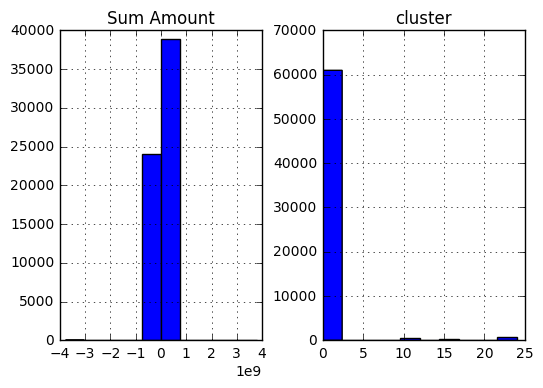

In [19]:
results = pd.DataFrame({'cluster' : clusters,'Account' : je_data['Account'],'Date' : je_data['Date'],
                        'Sum Amount' : je_data['Sum Amount'], 'Line Descr' : je_data['Line Descr'],
                        'Journal ID' : je_data['Journal ID'],'User' : je_data['User'],
                        'Unit' : je_data['Unit'],'Resource' : je_data['Resource'],
                        'Activity' : je_data['Activity'],'Physical Loc' : je_data['Physical Loc'],
                        'Project' : je_data['Project'],'Currency' : je_data['Currency'],
                        'Sys Source' : je_data['Sys Source'],'Source' : je_data['Source']})
cluster_counts = results.groupby('cluster')['Sum Amount'].value_counts()
results.hist()

In [20]:
results.describe()

,Sum Amount,cluster
count,6.295400e+04,62954.000000
mean,-8.943528e-10,0.525558
std,7.269467e+07,3.105996
min,-3.781887e+09,0.000000
25%,-1.132744e+04,0.000000
50%,0.000000e+00,0.000000
75%,1.152451e+04,0.000000
max,3.781887e+09,24.000000


In [21]:
#Group results by cluster
bycluster = results.groupby('cluster')

In [22]:
#extract data per cluster where the the cluster has fewer than 20 values
kclusters=bycluster.filter(lambda x: len(x) < 20)

In [23]:
print len(kclusters)

81


In [25]:
print len(je_data)

62954


In [24]:
#export results
kclusters.to_excel('kmeans_je_jan_jun.xlsx', sheet_name='Sheet1')  

In [ ]:
# This always errors due to not enough memory
# from sklearn.preprocessing import scale
# data_matrix = scale(data_matrix.todense())